### Notebook Content

## Multiclass Classification
1. Multiclass Logistic Regression](#Multiclass-Logistic-Regression)<br>
2. Support Vector Classifier
3. Multinomial Naive Bayes Classifier
4. Bernoulli Naive Bayes Classifier
5. Gaussian Naive Bayes Classifier
6. Decision Tree Classifier
7. Random Forest
8. Gradient Boosting
9. XGBoost Classifier
10. Stochastic Gradient
11. KNN Classifier



# Multiclass classification using the different algorithms

We first import the dataset for multiclass classification. We will be using the fruit dataset for classification of fruits on the basis of the features such as mass, height, etc that can be seen in the dataframe below.

Dataser Link: https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/fruit_data_with_colors.txt


In [36]:
fruits = pd.read_csv('dataset/fruit.csv')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


We have 59 pieces of fruits, 7 features in the dataset and 4 types of fruits in the dataset:

In [37]:
fruits.shape

(59, 7)

In [38]:
print(fruits.fruit_name.unique())

['apple' 'mandarin' 'orange' 'lemon']


In [39]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


## Create Training and Test Sets and Apply Scaling

In [40]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Multiclass Logistic Regression


Multinomial logistic regression is used when the dependent variable in question is nominal (equivalently categorical, meaning that it falls into any one of a set of categories that cannot be ordered in any meaningful way) and for which there are more than two categories.

Multinomial logistic regression is known by a variety of other names, including polytomous LR, multiclass LR, softmax regression, multinomial logit (mlogit), the maximum entropy (MaxEnt) classifier.

In [41]:
LogReg = LogisticRegression()
model = LogReg.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 46.67%


In [42]:
print(confusion_matrix(y_test, prediction))

[[4 0 0 0]
 [1 0 0 0]
 [6 0 1 1]
 [0 0 0 2]]


In [43]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.36      1.00      0.53         4
           2       0.00      0.00      0.00         1
           3       1.00      0.12      0.22         8
           4       0.67      1.00      0.80         2

    accuracy                           0.47        15
   macro avg       0.51      0.53      0.39        15
weighted avg       0.72      0.47      0.37        15



C:\Users\raghuram\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
print(model.intercept_)
print(model.coef_)

[ 0.08278217  0.18575457 -0.84069224  0.57215549]
[[ 0.02305093  1.42003984 -0.45378509  0.24501545]
 [-0.72149447 -0.84325007 -1.4654268   0.25798641]
 [ 0.99894047  0.90013732  0.25421165  0.42918773]
 [-0.30049693 -1.47692709  1.66500023 -0.93218959]]


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Support Vector Classifier for Multiclass classification

LinearSVC implement the “one-versus-one” approach for multi-class classification.
In total, n_classes * (n_classes - 1) / 2 classifiers are constructed and each one trains data from two classes. 


In [45]:
svm = LinearSVC()
model = svm.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 46.67%


In [46]:
print(confusion_matrix(y_test, prediction))

[[3 0 1 0]
 [0 1 0 0]
 [6 0 1 1]
 [0 0 0 2]]


In [47]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.33      0.75      0.46         4
           2       1.00      1.00      1.00         1
           3       0.50      0.12      0.20         8
           4       0.67      1.00      0.80         2

    accuracy                           0.47        15
   macro avg       0.62      0.72      0.62        15
weighted avg       0.51      0.47      0.40        15



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Multinomial Naive Bayes Classifier for multiclass classification

It is based on Bayes’s theorem which gives an assumption of independence among predictors. 
A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 

In [48]:
MNB = MultinomialNB()
model = MNB.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 40.0%


In [49]:
print(confusion_matrix(y_test, prediction))

[[4 0 0 0]
 [1 0 0 0]
 [8 0 0 0]
 [0 0 0 2]]


In [50]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.31      1.00      0.47         4
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         8
           4       1.00      1.00      1.00         2

    accuracy                           0.40        15
   macro avg       0.33      0.50      0.37        15
weighted avg       0.22      0.40      0.26        15



C:\Users\raghuram\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Bernoulli Naive Bayes Classifier for multiclass classification

BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input.

In [51]:
BNB = BernoulliNB()
model = BNB.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 26.67%


In [52]:
print(confusion_matrix(y_test, prediction))

[[4 0 0 0]
 [1 0 0 0]
 [8 0 0 0]
 [2 0 0 0]]


In [53]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.27      1.00      0.42         4
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         2

    accuracy                           0.27        15
   macro avg       0.07      0.25      0.11        15
weighted avg       0.07      0.27      0.11        15



C:\Users\raghuram\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Gaussian Naive Bayes Classifier for multiclass classfication

GaussianNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Gaussian distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Gaussian, boolean) variable.<br>
Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a GaussianNB instance may binarize its input.

In [54]:
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 66.67%


In [55]:
print(confusion_matrix(y_test, prediction))

[[4 0 0 0]
 [0 1 0 0]
 [4 0 3 1]
 [0 0 0 2]]


In [56]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         4
           2       1.00      1.00      1.00         1
           3       1.00      0.38      0.55         8
           4       0.67      1.00      0.80         2

    accuracy                           0.67        15
   macro avg       0.79      0.84      0.75        15
weighted avg       0.82      0.67      0.64        15



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Decision Tree Classifier for multiclass classfication

Decision tree classifier is a systematic approach for multiclass classification. It poses a set of questions to the dataset (related to its attributes/features). The decision tree classification algorithm can be visualized on a binary tree. On the root and each of the internal nodes, a question is posed and the data on that node is further split into separate records that have different characteristics. The leaves of the tree refer to the classes in which the dataset is split.

In [57]:
dt = DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020)
model = dt.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 73.33%


In [58]:
print(confusion_matrix(y_test, prediction))

[[4 0 0 0]
 [0 1 0 0]
 [2 0 5 1]
 [1 0 0 1]]


In [59]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.57      1.00      0.73         4
           2       1.00      1.00      1.00         1
           3       1.00      0.62      0.77         8
           4       0.50      0.50      0.50         2

    accuracy                           0.73        15
   macro avg       0.77      0.78      0.75        15
weighted avg       0.82      0.73      0.74        15



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Random Forest Classifier for multiple classes

Random forest are an ensemble learning method. It operates by constructing a multitude of decision trees at training time and outputs the class that is the mode of the classes of the individual trees. A random forest is a meta-estimator that fits a number of trees on various subsamples of data sets and then uses an average to improve the accuracy in the model’s predictive nature. The sub-sample size is always the same as that of the original input size but the samples are often drawn with replacements.

We should use this algorithm when we need high accuracy while working with large datasets with higher dimensions. We can also use it if there are missing values in the dataset. We should not use it if we have less time for modeling or if large computational costs and memory space are a constrain.

In [60]:
rf = RandomForestClassifier()
model = rf.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 86.67%


In [61]:
print(confusion_matrix(y_test, prediction))

[[4 0 0 0]
 [0 1 0 0]
 [1 0 6 1]
 [0 0 0 2]]


In [62]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         1
           3       1.00      0.75      0.86         8
           4       0.67      1.00      0.80         2

    accuracy                           0.87        15
   macro avg       0.87      0.94      0.89        15
weighted avg       0.90      0.87      0.87        15



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Gradient Boosting Classifier for multiclass classificaton

GB builds an additive model in a forward stage-wise fashion It allows for the optimization of arbitrary differentiable loss functions. Binary classification is a special case where only a single regression tree is induced.

In [63]:
gbc = GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55)

model = gbc.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 53.33%


In [64]:
print(confusion_matrix(y_test, prediction))

[[4 0 0 0]
 [1 0 0 0]
 [4 0 3 1]
 [1 0 0 1]]


In [65]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.40      1.00      0.57         4
           2       0.00      0.00      0.00         1
           3       1.00      0.38      0.55         8
           4       0.50      0.50      0.50         2

    accuracy                           0.53        15
   macro avg       0.47      0.47      0.40        15
weighted avg       0.71      0.53      0.51        15



C:\Users\raghuram\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# XGBoost Classifier for multiclass classification

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. Rather than training all the models in isolation of one another, boosting trains models in succession with each new model being trained to correct the errors made by the previous ones.

In a standard ensemble method where models are trained in isolation, all of the models might simply end up making the same mistakes. We should use this algorithm when we require fast and accurate predictions after the model is deployed.

In [66]:
xgb = XGBClassifier(loss = 'deviance',
                                learning_rate = 0.01,
                                n_estimators = 10,
                                max_depth = 5,
                                verbosity=0,
                                random_state=2020)

model = xgb.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 66.67%


In [67]:
print(confusion_matrix(y_test, prediction))

[[4 0 0 0]
 [0 1 0 0]
 [4 0 3 1]
 [0 0 0 2]]


In [68]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         4
           2       1.00      1.00      1.00         1
           3       1.00      0.38      0.55         8
           4       0.67      1.00      0.80         2

    accuracy                           0.67        15
   macro avg       0.79      0.84      0.75        15
weighted avg       0.82      0.67      0.64        15



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Stochastic Gradient Descent for multiclass classification

SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

In [69]:
sdg = SGDClassifier()
model = sdg.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 66.67%


In [70]:
print(confusion_matrix(y_test, prediction))

[[1 0 2 1]
 [0 1 0 0]
 [1 0 6 1]
 [0 0 0 2]]


In [71]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.50      0.25      0.33         4
           2       1.00      1.00      1.00         1
           3       0.75      0.75      0.75         8
           4       0.50      1.00      0.67         2

    accuracy                           0.67        15
   macro avg       0.69      0.75      0.69        15
weighted avg       0.67      0.67      0.64        15



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# KNN Classifier for multiclass classification

It is a lazy learning algorithm that stores all instances corresponding to training data in n-dimensional space To label a new point, it looks at the labeled points closest to that new point also known as its nearest neighbors.

We should use KNN when the dataset is small. KNN performs better with a lower number of features than a large number of features. It can be said that when the number of features increases than it requires more data
KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.

In [72]:
knn = KNeighborsClassifier()
model = knn.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 100.0%


In [73]:
print(confusion_matrix(y_test, prediction))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]


In [74]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Classifiers Report (multiclass classification)

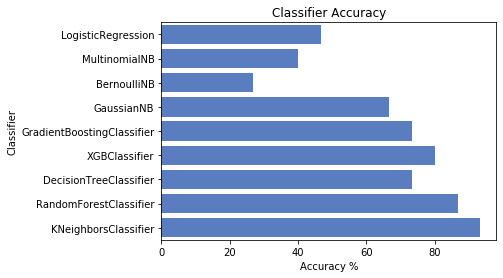

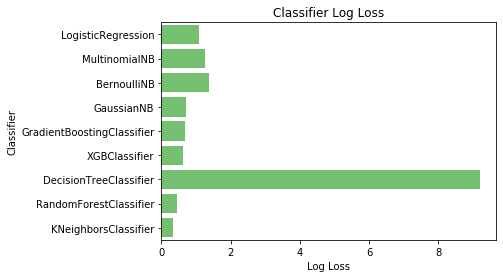

In [75]:
import matplotlib.pyplot as plt
classifiers = [ LogisticRegression(),
                MultinomialNB(),
                BernoulliNB(),
                GaussianNB(),
                GradientBoostingClassifier(loss = 'deviance', n_estimators = 10,max_depth = 5,random_state=2020),
                XGBClassifier(loss = 'deviance', n_estimators = 10,max_depth = 5,random_state=2020,verbosity=0),
                DecisionTreeClassifier(criterion= 'entropy',max_depth = 10,splitter='best', random_state=2020),
                RandomForestClassifier(),
                KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute')
              ]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    model = clf
    model.fit(X_train,y_train)
    name = clf.__class__.__name__ 
    
    #Accuracy
    train_predictions = model.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    
    #Log Loss
    train_predictions = model.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

    
    
#Visualization 
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()    